In [5]:
import csv
import cv2
import os

labels = ["Stand","Fall"]
PREPROCESS_FOLDER = "Preprocess/"
for label in labels:
    for subdir, dirs, files in os.walk("Dataset/" + label):
        for file in files:
            
            filepath = subdir + os.sep + file
            # Open the video file
            cap = cv2.VideoCapture(filepath)

            # Get the total number of frames
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            count = 0

            # Extract the frames from the video and save them to disk
            for i in range(total_frames):
                _, frame = cap.read()
                # label = file[:-4] # Use 'none' as the default label if there is no label for this frame
                # print(label)
                if i%(1*2) == 0 :
                    cv2.imwrite(f'{PREPROCESS_FOLDER}/{label}/{file[:-4]}_frame_{i}_{label}.jpg', frame)
                    print(f'{PREPROCESS_FOLDER}/{label}/{file[:-4]}_frame_{i}_{label}.jpg')

        # Release the video file
        cap.release()

Preprocess//Stand/VID20230116131337_frame_0_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_2_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_4_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_6_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_8_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_10_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_12_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_14_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_16_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_18_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_20_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_22_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_24_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_26_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_28_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_30_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_32_Stand.jpg
Preprocess//Stand/VID20230116131337_frame_34_Stand.jpg
Preprocess//Sta

In [7]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("Preprocess", output="Split_Preprocess",
    seed=1337, ratio=(.8, .2))

177 175


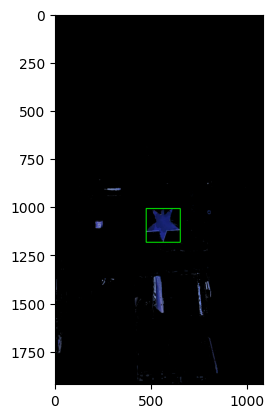

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image
img = cv2.imread('C:\Work\Intern\Image Classification\Preprocess\Stand\VID20230116131337_frame_0_Stand.jpg')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range of red color in HSV
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Threshold the image to get only red colors
mask = cv2.inRange(hsv, lower_red, upper_red)

# Bitwise-AND the original image and the mask to segment the red color
segmented_img = cv2.bitwise_and(img, img, mask=mask)

contours,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# for c in contours:
#     x,y,w,h = cv2.boundingRect(c)
#     cv2.rectangle(segmented_img,(x,y), (x+w,y+h),(0,255,0),4)

c = max(contours,key=cv2.contourArea)

x,y,w,h = cv2.boundingRect(c)
print(w,h)
cv2.rectangle(segmented_img ,(x,y), (x+w,y+h),(0,255,0),4)


plt.imshow(segmented_img)
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image
img = cv2.imread('C:\Work\Intern\Image Classification\Preprocess\Stand\VID20230116131337_frame_0_Stand.jpg')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range of red color in HSV
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Threshold the image to get only red colors
mask = cv2.inRange(hsv, lower_red, upper_red)

# Bitwise-AND the original image and the mask to segment the red color
segmented_img = cv2.bitwise_and(img, img, mask=mask)

contours,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# for c in contours:
#     x,y,w,h = cv2.boundingRect(c)
#     cv2.rectangle(segmented_img,(x,y), (x+w,y+h),(0,255,0),4)

c = max(contours,key=cv2.contourArea)

x,y,w,h = cv2.boundingRect(c)
print(w,h)
cv2.rectangle(segmented_img ,(x,y), (x+w,y+h),(0,255,0),4)


plt.imshow(segmented_img)
plt.show()

In [12]:
import numpy as np
#  Create a function to handle mouse events
def on_mouse(event, x, y, flags, param):
    global hsv_img, lower_hsv, upper_hsv

    # Check if the left mouse button is pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        # Get the HSV value of the pixel at (x, y)
        pixel = hsv_img[y, x]
        
        # Set the lower and upper HSV bounds to the pixel value
        lower_hsv = pixel
        upper_hsv = pixel
        
        # Display the lower and upper HSV bounds
        print("Lower HSV:", lower_hsv)
        print("Upper HSV:", upper_hsv)
        # Convert the image to the HSV color space
        hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Create a mask using the lower and upper HSV bounds
        mask = cv2.inRange(hsv_img, lower_hsv, upper_hsv)
        masked_img = cv2.bitwise_and(frame, frame, mask=mask)


cap = cv2.VideoCapture("Camp.mp4")
# Create a window for the HSV image
cv2.namedWindow("HSV")

# Set the mouse callback function for the HSV window
cv2.setMouseCallback("HSV", on_mouse)

# Create variables to store the lower and upper HSV bounds
lower_hsv = np.array([0,  93, 131])
upper_hsv = np.array([255, 255, 255])


# Read a frame from the video
ret, frame = cap.read()

# Check if the video has ended



# Convert the image to the HSV color space
hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Create a mask using the lower and upper HSV bounds
mask = cv2.inRange(hsv_img, lower_hsv, upper_hsv)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(frame, frame, mask=mask)

# Display the original image
cv2.imshow("Original", frame)

# Display the image in the HSV color space
cv2.imshow("HSV", hsv_img)

# Display the masked image
cv2.imshow("Masked", masked_img)

    
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np

# Load an image
cap = cv2.VideoCapture("Camp.mp4")

# Read a frame from the video
ret, frame = cap.read()

# Check if the video has ended
if not ret:
    print("Error: Could not read frame from video.")
    exit()

frame = cv2.resize(frame, (500, 500))

# Create a copy of the original frame
clone = frame.copy()

# Define the starting and ending points for cropping
start_point = None
end_point = None
cropping = False

# Define the mouse callback function
def mouse_crop(event, x, y, flags, param):
    global start_point, end_point, cropping
    
    # Start cropping when the left mouse button is pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        cropping = True
    
    # End cropping when the left mouse button is released
    elif event == cv2.EVENT_LBUTTONUP:
        end_point = (x, y)
        cropping = False
        
        # Draw the rectangle around the cropped area
        cv2.rectangle(clone, start_point, end_point, (0, 255, 0), 2)
        cv2.imshow("Cropped Image", clone)
        
        # Crop the original frame using the start and end points
        cropped = frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]
        cv2.imshow("Cropped Image", cropped)

# Create a window and set the mouse callback function
cv2.namedWindow("Cropped Image")
cv2.setMouseCallback("Cropped Image", mouse_crop)

# Display the original frame
cv2.imshow("Cropped Image", clone)

# Wait for a key press
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
import cv2
import numpy as np

# Load an image
cap = cv2.VideoCapture("Camp.mp4")

# Read a frame from the video
ret, frame = cap.read()

# Check if the video has ended
if not ret:
    print("Error: Could not read frame from video.")
    exit()

frame = cv2.resize(frame, (500, 500))

# Create a copy of the original frame
clone = frame.copy()

# Define the starting and ending points for cropping
start_point = None
end_point = None
cropping = False

# Define the mouse callback function
def mouse_crop(event, x, y, flags, param):
    global start_point, end_point, cropping
    
    # Start cropping when the left mouse button is pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        print("Start point: ", start_point)
        cropping = True
    
    # End cropping when the left mouse button is released
    elif event == cv2.EVENT_LBUTTONUP:
        end_point = (x, y)
        cropping = False
        print("End point: ", end_point)
        
        # Draw the rectangle around the cropped area
        cv2.rectangle(clone, start_point, end_point, (0, 255, 0), 2)
        cv2.imshow("Cropped Image", clone)
        
        # Crop the original frame using the start and end points
        cropped = frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]
        cv2.imshow("Cropped Image", cropped)

# Create a window and set the mouse callback function
cv2.namedWindow("Cropped Image")
cv2.setMouseCallback("Cropped Image", mouse_crop)

# Display the original frame
cv2.imshow("Cropped Image", clone)

# Wait for a key press
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

Start point:  (27, 242)
End point:  (325, 357)


In [6]:
import cv2
import numpy as np

# Load an image
cap = cv2.VideoCapture("Camp.mp4")

# Read a frame from the video
ret, frame = cap.read()

# Check if the video has ended
if not ret:
    print("Error: Could not read frame from video.")
    exit()

frame = cv2.resize(frame, (500, 500))

frame = frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]


hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create a window to display the sliders
cv2.namedWindow("HSV Mask")

# Create trackbars for hue, saturation, and value
cv2.createTrackbar("LHue", "HSV Mask", 0, 255, lambda x: x)
cv2.createTrackbar("UHue", "HSV Mask", 1, 255, lambda x: x)
cv2.createTrackbar("Saturation", "HSV Mask", 0, 255, lambda x: x)
cv2.createTrackbar("Value", "HSV Mask", 0, 255, lambda x: x)

while True:
    # Get the current values of the trackbars
    uhue = cv2.getTrackbarPos("UHue", "HSV Mask")
    lhue = cv2.getTrackbarPos("LHue", "HSV Mask")
    sat = cv2.getTrackbarPos("Saturation", "HSV Mask")
    val = cv2.getTrackbarPos("Value", "HSV Mask")

    # Define the range of HSV values to mask
    lower_bound = np.array([lhue, sat, val])
    upper_bound = np.array([uhue, 255, 255])

    # Create a mask for the desired HSV range
    mask = cv2.inRange(hsv_img,  lower_bound, upper_bound)

    # Apply the mask to the original image
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Display the original image
    cv2.imshow("Original", frame)

    # Display the result of applying the mask
    cv2.imshow("HSV Mask", result)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()







In [7]:
import cv2
import numpy as np

# Load an image
cap = cv2.VideoCapture("Camp.mp4")

# Read a frame from the video
ret, frame = cap.read()

# Check if the video has ended
if not ret:
    print("Error: Could not read frame from video.")
    exit()

frame = cv2.resize(frame, (500, 500))

frame = frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]

# Convert the image to the HSV color space
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


# Create a mask for the color range
omask = cv2.inRange(hsv_frame, lower_bound, upper_bound)

# Invert the omask
omask = cv2.bitwise_not(omask)

# Remove the color from the image using the inverted omask
frame = cv2.bitwise_and(frame, frame, mask=omask)


hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create a window to display the sliders
cv2.namedWindow("HSV Mask")

# Create trackbars for hue, saturation, and value
cv2.createTrackbar("LHue", "HSV Mask", 0, 255, lambda x: x)
cv2.createTrackbar("UHue", "HSV Mask", 1, 255, lambda x: x)
cv2.createTrackbar("Saturation", "HSV Mask", 0, 255, lambda x: x)
cv2.createTrackbar("Value", "HSV Mask", 0, 255, lambda x: x)

while True:
    # Get the current values of the trackbars
    uhue = cv2.getTrackbarPos("UHue", "HSV Mask")
    lhue = cv2.getTrackbarPos("LHue", "HSV Mask")
    sat = cv2.getTrackbarPos("Saturation", "HSV Mask")
    val = cv2.getTrackbarPos("Value", "HSV Mask")

    # Define the range of HSV values to mask
    lower = np.array([lhue, sat, val])
    upper = np.array([uhue, 255, 255])

    # Create a mask for the desired HSV range
    mask = cv2.inRange(hsv_img, lower, upper)

    # Apply the mask to the original image
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Display the original image
    cv2.imshow("Original", frame)

    # Display the result of applying the mask
    cv2.imshow("HSV Mask", result)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()







In [12]:
import cv2
import numpy as np

# Load an image
cap = cv2.VideoCapture("Camp.mp4")

# Read a frame from the video
ret, frame = cap.read()

# Check if the video has ended
if not ret:
    print("Error: Could not read frame from video.")
    exit()

frame = cv2.resize(frame, (500, 500))

frame = frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]

# Convert the image to the HSV color space
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


# Create a mask for the color range
omask = cv2.inRange(hsv_frame, lower_bound, upper_bound)

# Invert the omask
omask = cv2.bitwise_not(omask)

# Remove the color from the image using the inverted omask
frame = cv2.bitwise_and(frame, frame, mask=omask)

hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create a mask for the desired HSV range
mask = cv2.inRange(hsv_img, lower, upper)

# Apply the mask to the original image
result = cv2.bitwise_and(frame, frame, mask=mask)
cv2.namedWindow("HSV Mask")
cv2.createTrackbar("Area", "HSV Mask", 0, 1000, lambda x: x)
cv2.createTrackbar("Area2", "HSV Mask", 0, 1000, lambda x: x)

while True:
    result2 = result.copy()
    area_threshold1 = cv2.getTrackbarPos("Area", "HSV Mask")
    area_threshold2 = cv2.getTrackbarPos("Area2", "HSV Mask")
    contours,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        if area_threshold1 < cv2.contourArea(c) < area_threshold2:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(result2,(x-10,y-10), ((x+w)+10,(y+h)+10),(0,255,0),1)


    # Display the result of applying the mask
    cv2.imshow("HSV Mask", result2)
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()

# Close all windows
cv2.destroyAllWindows()

In [18]:
import cv2
import numpy as np
import time


cap = cv2.VideoCapture("Camp.mp4")
while True:
    # Load an image
    

    # Read a frame from the video
    ret, frame = cap.read()

    

    # Check if the video has ended
    if not ret:
        break

    frame = cv2.resize(frame, (500, 500))
    org = frame.copy()
    cv2.imshow("Original", frame)

    frame = frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]

    # Convert the image to the HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


    # Create a mask for the color range
    omask = cv2.inRange(hsv_frame, lower_bound, upper_bound)

    # Invert the omask
    omask = cv2.bitwise_not(omask)

    # Remove the color from the image using the inverted omask
    frame = cv2.bitwise_and(frame, frame, mask=omask)

    hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)    
    # Create a mask for the desired HSV range   
    mask = cv2.inRange(hsv_img, lower, upper)

    # Apply the mask to the original image
    result = cv2.bitwise_and(frame, frame, mask=mask)


    result2 = result.copy()
    contours,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        print(cv2.contourArea(c))
        if area_threshold1 < cv2.contourArea(c) < area_threshold2:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(result2,(x-10,y-10), ((x+w)+10,(y+h)+10),(0,255,0),1)

    
    # Display the result of applying the mask
    cv2.imshow("HSV Mask", mask)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    time.sleep(0.2)

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


0.0
12.0
28.5
26.5
22.0
30.0
12.0
26.0
26.5
24.0
30.5
11.0
27.5
25.5
24.0
30.5
10.0
27.5
25.5
21.0
28.0
10.0
29.0
26.5
20.5
29.5
10.0
28.0
24.0
21.5
29.5
10.0
28.5
27.0
22.0
27.5
11.0
28.0
28.5
26.0
22.0
13.0
29.0
26.5
21.0
29.0
10.0
28.0
25.0
22.0
30.5
10.5
28.0
28.0
22.5
32.5
10.0
29.0
24.5
23.5
30.5
7.5
28.0
27.0
23.5
29.5
0.0
9.5
29.0
27.5
29.5
23.0
12.0
29.0
27.0
22.0
28.0
8.5
29.0
24.0
22.0
33.0
8.5
28.0
25.0
21.5
30.5
10.0
28.0
26.0
19.5
26.0
11.0
29.5
26.5
21.5
27.5
9.5
28.0
27.0
21.0
30.5
8.5
29.5
26.0
21.0
31.0
12.0
28.5
26.5
23.5
28.5
13.0
28.5
26.5
23.5
28.5
0.0
13.0
30.5
28.0
23.0
29.5
0.5
0.0
8.5
30.0
27.5
23.5
30.0
0.0
0.5
7.5
32.0
26.5
23.5
31.5
0.5
8.5
25.0
27.5
20.0
32.5
0.0
9.0
28.0
27.5
21.0
32.5
6.5
29.5
26.5
20.5
30.0
7.5
29.0
26.0
20.0
30.5
0.0
7.5
27.0
25.0
23.5
30.0
0.0
0.0
7.5
29.0
24.0
22.0
22.0
8.5
30.0
22.0
24.0
29.0
9.5
30.0
25.0
21.5
25.5
11.0
31.0
24.5
21.0
26.0
11.0
30.0
25.0
21.0
26.0
12.0
28.5
25.0
21.0
26.5
12.0
29.0
25.5
23.5
29.5
13.0
30.0
27.0
22.

In [ ]:
import cv2

# Load an image
cap = cv2.VideoCapture("Camp.mp4")

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the video has ended
    if not ret:
        break

    frame = cv2.resize(frame, (500, 500))

    # Convert the image to the RGB color space
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert the image to the HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Convert the image to the LAB color space
    lab_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)

    # Convert the image to the LUV color space
    luv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2LUV)

    # Convert the image to the YCrCb color space
    ycrcb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

    # Convert the image to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the original image
    cv2.imshow("Original", frame)

    # Display the image in the RGB color space
    cv2.imshow("RGB", rgb_frame)

    # Display the image in the HSV color space
    cv2.imshow("HSV", hsv_frame)

    # Display the image in the LAB color space
    cv2.imshow("LAB", lab_frame)

    # Display the image in the LUV color space
    cv2.imshow("LUV", luv_frame)

    # Display the image in the YCrCb color space
    cv2.imshow("YCrCb", ycrcb_frame)

    # Display the image in grayscale
    cv2.imshow("Grayscale", gray_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
# Load an image
cap = cv2.VideoCapture("Camp.mp4")

# Read a frame from the video
ret, img = cap.read()

# Check if the video has ended
if not ret:
    break

# Convert the image to the HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the color you want to exclude
lower_bound = np.array([65, 0, 0])
upper_bound = np.array([97, 255, 255])

# Create a mask for the color range
mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

# Invert the mask
mask = cv2.bitwise_not(mask)

# Remove the color from the image using the inverted mask
img = cv2.bitwise_and(img, img, mask=mask)

# Display the original image
cv2.imshow("Original", img)

# Wait for a key press
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load an image
img = cv2.imread("path/to/image.jpg")

# Convert the image to the RGB color space
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to the HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the image to the LAB color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Convert the image to the LUV color space
luv_img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)

# Convert the image to the YCrCb color space
ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# concatenate the images horizontally
images_list = [rgb_img, hsv_img, gray_img, lab_img, luv_img, ycrcb_img]
side_by_side = np.concatenate(images_list, axis=1)

# Display the concatenated images
cv2.imshow("Side by Side", side_by_side)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2

# Load an image
img = cv2.imread("C:\Work\Intern\Image Classification\Preprocess\Stand\VID20230116131337_frame_0_Stand.jpg")

# Convert the image to the RGB color space
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to the HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Concatenate the images horizontally
side_by_side = cv2.hconcat([rgb_img, hsv_img, gray_img])

# Display the concatenated images
cv2.imshow("Side by Side", side_by_side)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf
from tensorflow import keras

lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Load the pre-trained ResNet50 model
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False)

# Freeze all layers in the base model
base_model.trainable = False

# Add a new classifier on top of the base model
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the train and validation data
datagen = keras.preprocessing.image.ImageDataGenerator()
train_generator = datagen.flow_from_directory(
    'Split_Preprocess/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Create a data generator for the validation dataset
val_generator = datagen.flow_from_directory(
    'Split_Preprocess/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')



In [ ]:
# Train the model
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator))

In [ ]:
train_generator.class_indices

In [ ]:
gen = datagen.flow(X, y, batch_size=32)

# Get a batch of images and labels
X_batch, y_batch = next(gen)

# Plot the first image in the batch
plt.imshow(X_batch[0])
plt.show()

In [ ]:
model.save('model2.h5')

In [ ]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model('model.h5')

In [ ]:
import cv2
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('model2.h5')

# Open the video
cap = cv2.VideoCapture('C:\Work\Intern\Image Classification\VID20230116131651.mp4')

labels = ["Fall","Stand"]
count = 0
label = 0
confidence = 0
# Get the frames from the video
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (500, 500))
    
    if count % 3 == 0:
        # Preprocess the frame
        frame2 = cv2.resize(frame, (224, 224))
        # frame = frame.astype("float32") / 255.0
        frame2 = np.expand_dims(frame2, axis=0)
        
        
        # Use the model to predict the label of the frame
        predictions = model.predict(frame2)
        
        # Get the class label with the highest probability
        confidence =  round(np.max(predictions[0]),3)
        print('%.2f' % round(np.min(predictions[0]),3), '%.2f' % round(np.max(predictions[0]),3))
        if confidence > 0.5:
            label = np.argmax(predictions[0])
        # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Draw the label on the frame
        
    frame = cv2.rotate(frame, cv2.ROTATE_180)
    cv2.putText(frame, str(labels[label]) + f" (%.2f)" % confidence, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Display the frame
    cv2.imshow("Frame", frame)
    count+=1
    # Exit if the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video and close the window
cap.release()
cv2.destroyAllWindows()

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=lambda x: cv2.merge([cv2.inRange(cv2.cvtColor(x, cv2.COLOR_BGR2HSV), lower_red, upper_red)]*3))
train_generator = datagen.flow_from_directory(
    'Split_Preprocess/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

X_batch, y_batch = next(train_generator)
plt.imshow(X_batch[0])

plt.show()

In [ ]:
import cv2
import numpy as np
  
# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('Dataset\Stand\VID20230116131556.mp4')
  
# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")
  
# Read until video is completed
while(cap.isOpened()):
      
# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
    # Display the resulting frame
        cv2.imshow('Frame', frame)
          
    # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
  
# Break the loop
    else:
        break
  
# When everything done, release
# the video capture object
cap.release()
  
# Closes all the frames
cv2.destroyAllWindows()